# **Problema de Predição**




O problema de predição trata-se da insegurança durante a escolha de fornecedores para a compra de insumos e reestoque geral. Como solução, foi considerada a compra de insumos baseada no fornecedor mais compatível a determinadas caracteríticas (features), sendo cada critério avaliado de 0 a 10 pontos. A definição de fornecedor confiável ou não tão confiável provém de um resultado binário, considerando essas labels acima da média 8 e abaixo da média 8, respectivamente.

O dataset possui 500 fornecedores fictícios. Todos foram ranqueados com as seguintes features:

- **certificado** | Possui normas da Anvisa?
- **rastreavel** | Apresenta número de lote, validade, fabricante e instruções de uso?
- **suporte** | Disponibiliza treinamentos, manuais claros e equipe de apoio capacitada?
- **logistico** | Conta com centros de distribuição organizados, controle de
inventário e canais de atendimento prontos para responder rapidamente?
-	**qualidade** | Os produtos fornecidos, além de eficientes, são bem construídos, duráveis e reconhecidos pelo mercado?

In [ ]:
import pandas as pd
import numpy as np

# Gerar 500 fornecedores com notas entre 6 e 10
np.random.seed(42)  # Para reprodutibilidade
num_fornecedores = 500

data = {
    "certificado": np.round(np.random.uniform(6, 10, num_fornecedores), 2),
    "rastreavel": np.round(np.random.uniform(6, 10, num_fornecedores), 2),
    "suporte": np.round(np.random.uniform(6, 10, num_fornecedores), 2),
    "logistico": np.round(np.random.uniform(6, 10, num_fornecedores), 2),
    "qualidade": np.round(np.random.uniform(6, 10, num_fornecedores), 2),
}

df = pd.DataFrame(data)

# Calcular a média de cada fornecedor
df["media"] = df.mean(axis=1)

# Média global
media_global = df["media"].mean()

# Confiabilidade: 1 se acima da média global, 0 se abaixo
df["confiabilidade"] = (df["media"] > media_global).astype(int)

# Remover coluna auxiliar
df.drop(columns=["media"], inplace=True)

# Salvar CSV
csv_path = "fornecedores_500.csv"
df.to_csv(csv_path, index=False)
csv_path

## **KNN | K-Nearest Neighbors**

In [ ]:
# Importação de bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np

In [ ]:
# Leitura do dataset
df = pd.read_csv('./fornecedores.csv')
df.head()

,certificado,rastreavel,suporte,logistico,qualidade,confiabilidade
0,6.57,9.54,8.86,8.08,6.57,0
1,8.22,9.51,8.67,7.09,9.83,1
2,8.50,9.33,8.33,7.93,8.90,1
3,7.93,8.83,9.80,7.96,8.47,1
4,8.71,9.36,9.92,8.50,6.46,1


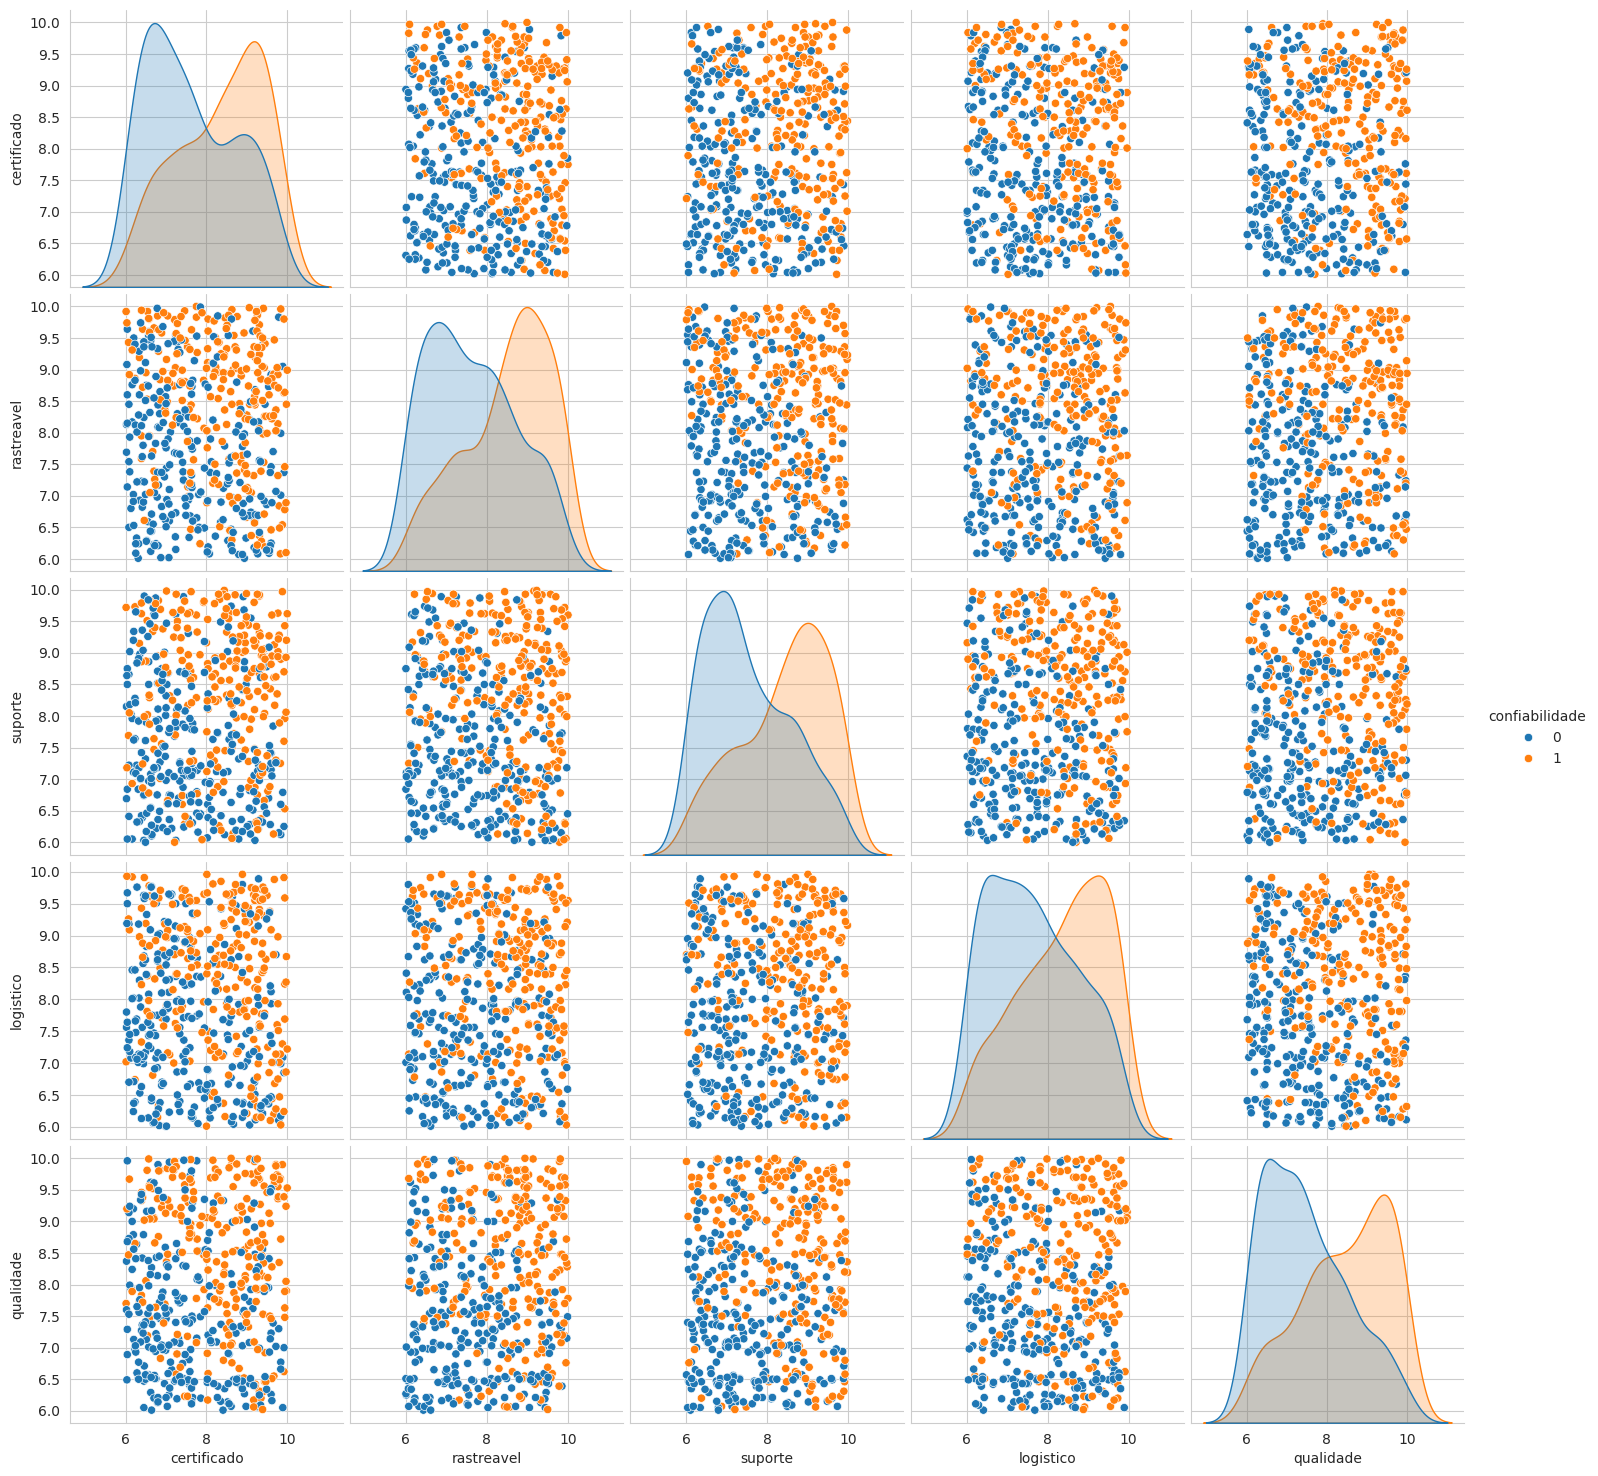

In [ ]:
# Exploratory Data Analysis (EDA) apresentando notas de features advindas de fornecedores em dataset
sns.set_style("whitegrid");
sns.pairplot(df, hue="confiabilidade", height=3);

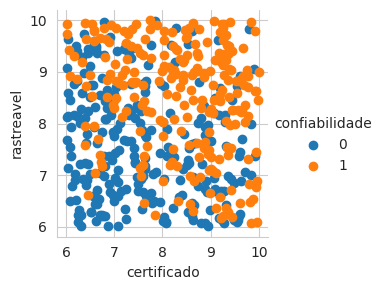

In [ ]:
# Exemplo de relação entre certificação e rastreabilidade visando confiabilidade do fornecedor
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='confiabilidade').map(plt.scatter, "certificado", "rastreavel").add_legend();

In [ ]:
# Normalização dos dados, proporcionando mesma escala para valores de diferentes features, e otimização de parâmetros eficientemente

X = df.drop('confiabilidade', axis=1) # Separação de feature-alvo (target) em dataframe
y = df['confiabilidade']

# Separação de dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Utilização de método StandardScaler para normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Exibição opcional de normalização bem sucedida para teste
# X_test

In [ ]:
# Treinamento e validação do modelo KNN sendo k = 3 inicialmente
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Separação de inferência para avaliar acurácia do modelo KNN
y_pred = knn.predict(X_test)

## **Avaliação do KNN**

In [ ]:
# Medição de acurácia do modelo KNN
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.896


In [ ]:
# Aplicação de validação cruzada para encontrar melhor valor de k
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

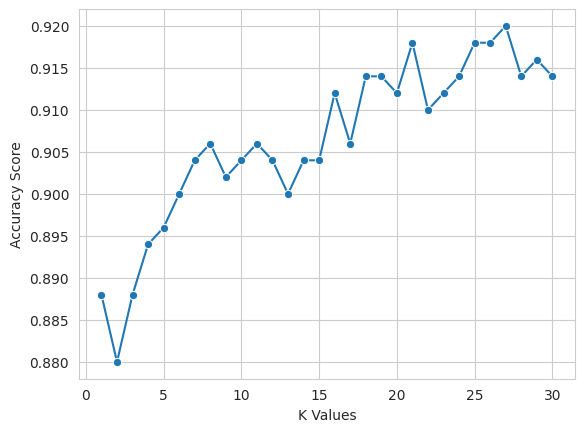

In [ ]:
# Projeção de gráfico da pontuação de acurácia
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
# Retreinamento do modelo utilizando melhor valor k
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [ ]:
# Avaliação de acurácia, precisão, recall e f1 (resultados podem ser diferentes devido a randomização)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", accuracy) # % de acertos
print("Precisão:", precision) # Evita falsos positivos
print("Recall:", recall) # Evita falsos negativos
print("F1:", f1) # Equilíbrio entre precisão e recall

Acurácia: 0.944
Precisão: 0.9607843137254902
Recall: 0.9074074074074074
F1: 0.9333333333333333


# **Regressão Logística**

In [ ]:
# Importação de bibliotecas necessárias
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# Instância de modelo
logreg = LogisticRegression(random_state=42)

# Treinamento do modelo reaproveitando separação de dados
logreg.fit(X_train, y_train)

# Obtenção de inferência
y_pred = logreg.predict(X_test)

# Nível de acurácia
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.984

In [ ]:
# Obtenção de coeficientes e intercepto
X = df.drop('confiabilidade', axis=1) # Reexecutando dataframe (não interfere nos resultados)

coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente (β)': logreg.coef_[0],
    'e^β (Odds Ratio)': [round(pow(2.71828, b), 3) for b in logreg.coef_[0]]
})

intercepto = logreg.intercept_[0]

print("Intercepto (β0):", intercepto) # Indica se o modelo tem propensão inicial a classificar fornecedores como confiáveis, mesmo antes de considerar as variáveis (certificado, rastreável, etc.).

print("\nCoeficientes interpretáveis:") # Cada ponto a mais em certificado aumenta (×2.58) as chances do fornecedor ser confiável.
print(coeficientes)

Intercepto (β0): -0.0035688595453757877

Coeficientes interpretáveis:
      Variável  Coeficiente (β)  e^β (Odds Ratio)
0  certificado         2.581459            13.216
1   rastreavel         2.890542            18.003
2      suporte         2.683382            14.634
3    logistico         2.606717            13.554
4    qualidade         2.659468            14.289


In [ ]:
# Avaliação de modelo utilizando matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix # Primeiro valor da primeira lista e segundo valor em lista abaixo são a quantidade de inferências corretas

array([[69,  2],
       [ 0, 54]])

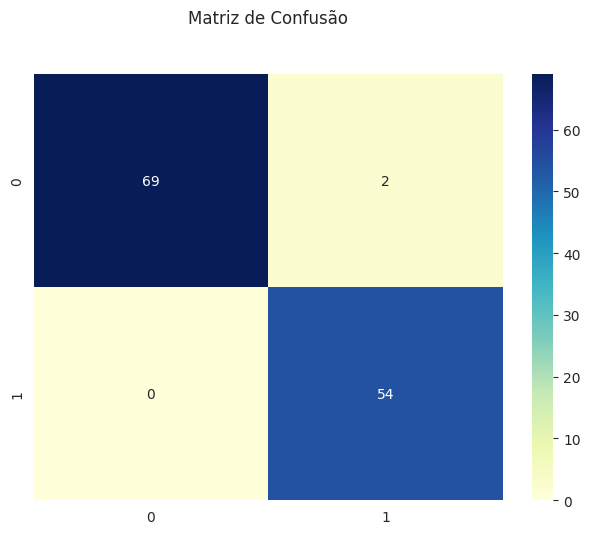

In [ ]:
# Criação de mapa de calor para matriz de confusão
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Criação de mapa de calor
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusão', y=1.1)
plt.show()

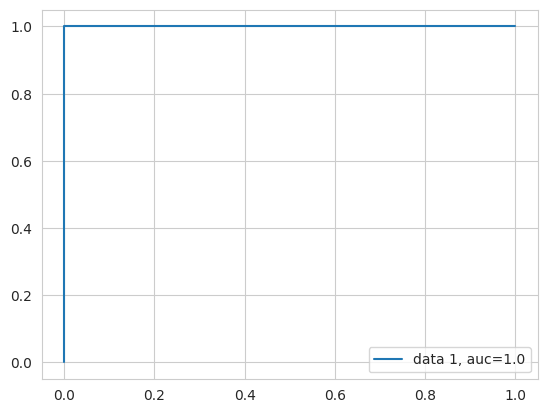

In [ ]:
# Curva ROC para comparar positivos com falso-positivos
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Comparação de Resultados**

Considerando normalização de dados em ambos os processos, além do mesmo uso de dataset, apesar do algoritmo de KNN parecer convincente ao executar cálculo de distância euclidiana entre variáveis para evitar flutuação de resposta, permitir multidimensionalidade e encontrar um melhor valor (k) para acurácia com validação cruzada, a regressão logística trouxe maior precisão e interpretação dos coeficientes mais intercepto, prezando por uma escolha de fornecedor para compra de insumos mais confiável.

Em termos de perfomance, não houveram intervalos consideráveis que atrasassem a execução dos modelos. Todavia, o tempo de resposta pode variar em decorrência do estado aleatório de treinamento dos modelos e quantidade de dados presentes em dataset.

Uma das peculiaridades do KNN em relação à regressão logística é a sua rápida implementação em sistemas experimentais e intuitiva visualização das features em Exploratory Data Analysis (EDA), permitindo melhor interpretação dos resultados. No que se diz respeito à regressão, se destacam menor propensão à overfitting, perfomance, escalabilidade, e pouca demanda de poder computacional.


# **Árvore de Decisão e Random Forest**

=== Decision Tree ===
R² treino: 0.864, R² teste: 0.344
MAE treino: 0.07, MAE teste: 0.19
RMSE treino: 0.18, RMSE teste: 0.40


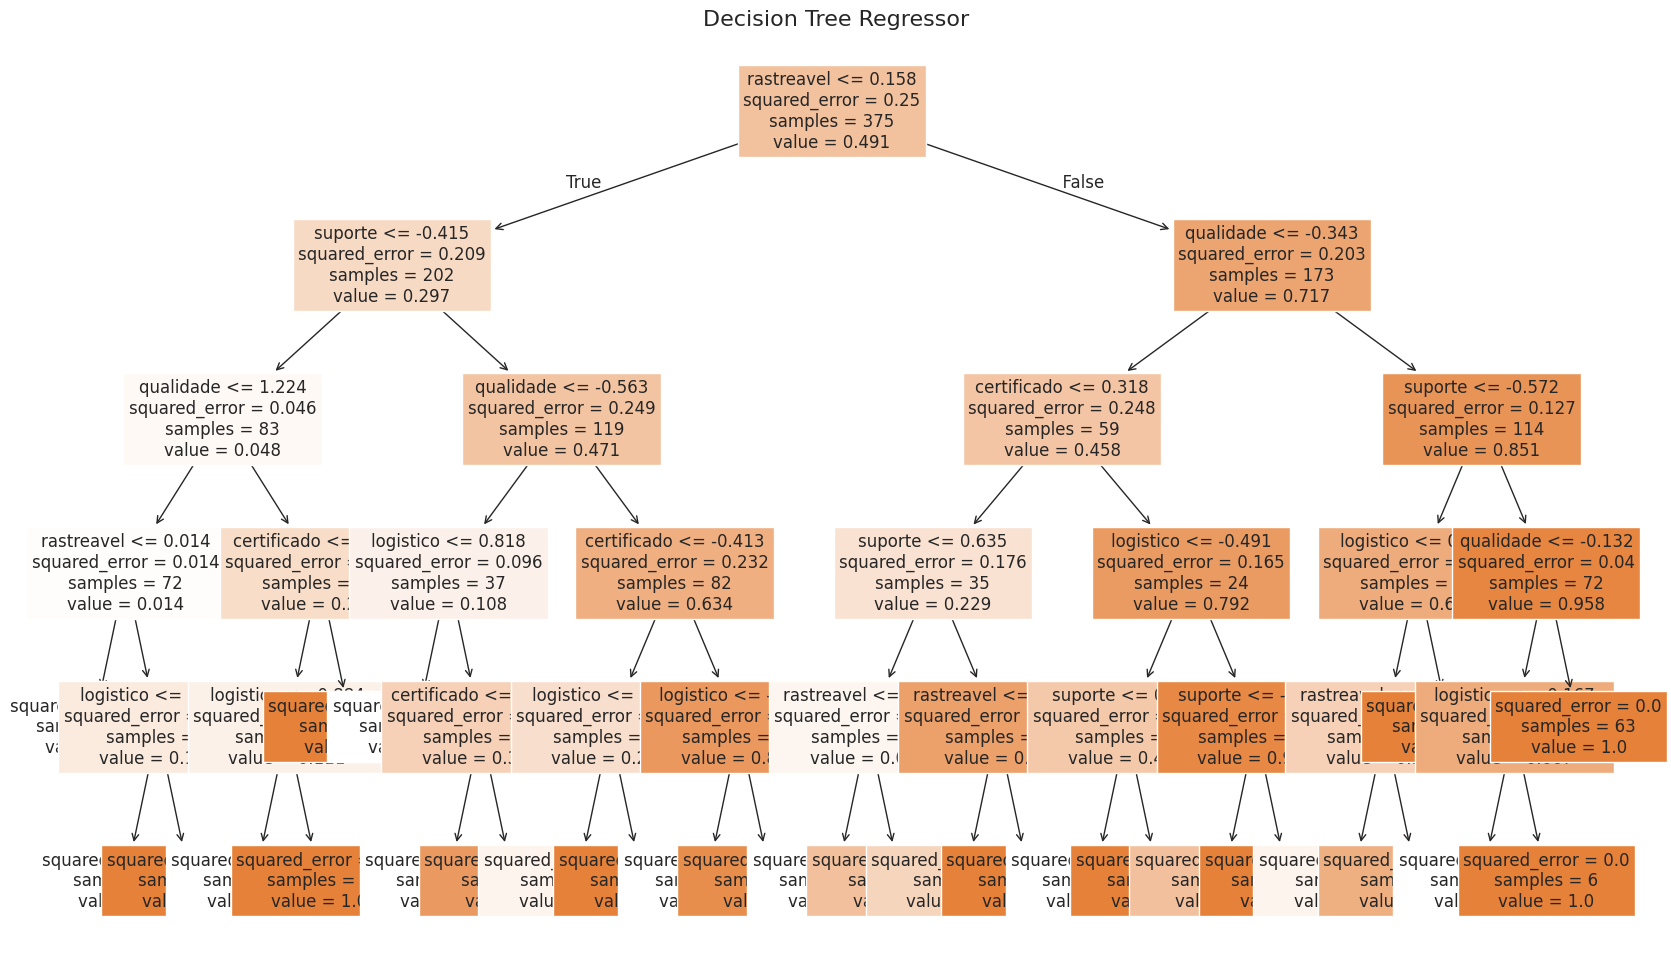


=== Random Forest ===
R² treino: 0.884, R² teste: 0.635
MAE treino: 0.13, MAE teste: 0.23
RMSE treino: 0.17, RMSE teste: 0.30


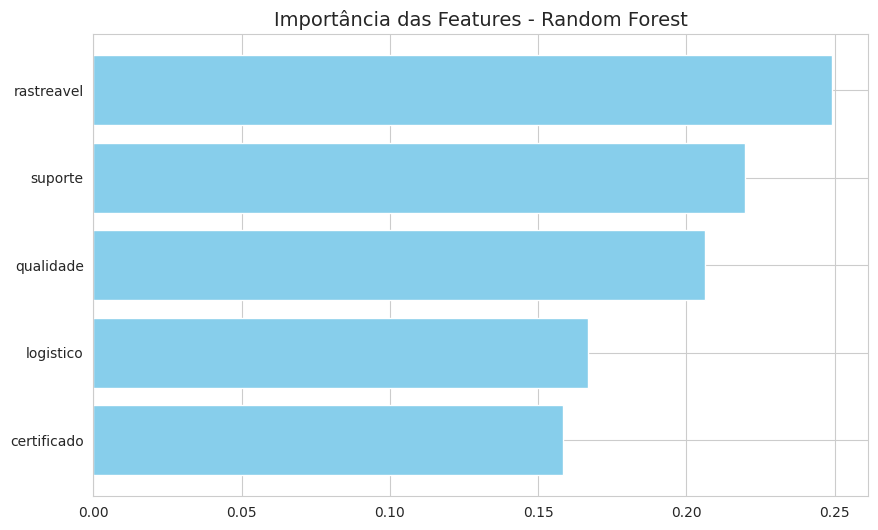

In [ ]:
# Importação de bibliotecas necessárias
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Separação do target
X = df.drop('confiabilidade', axis=1)
y = df['confiabilidade']

# Separação de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# ----- 1. Decision Tree -----
dt = DecisionTreeRegressor(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt  = dt.predict(X_test)

# Métricas DT
r2_train_dt = r2_score(y_train, y_train_pred_dt)
r2_test_dt  = r2_score(y_test, y_test_pred_dt)
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)
mae_test_dt  = mean_absolute_error(y_test, y_test_pred_dt)
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_test_dt  = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

print("=== Decision Tree ===")
print(f"R² treino: {r2_train_dt:.3f}, R² teste: {r2_test_dt:.3f}")
print(f"MAE treino: {mae_train_dt:.2f}, MAE teste: {mae_test_dt:.2f}")
print(f"RMSE treino: {rmse_train_dt:.2f}, RMSE teste: {rmse_test_dt:.2f}")

X_feature_names = X.columns.tolist()

# Plot árvore
plt.figure(figsize=(20,12))  # maior para ficar legível
plot_tree(dt, feature_names=X_feature_names, filled=True, fontsize=12)
plt.title("Decision Tree Regressor", fontsize=16)
plt.show()

# ----- 2. Random Forest -----
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)

# Previsões RF
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf  = rf.predict(X_test)

# Métricas RF
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf  = r2_score(y_test, y_test_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf  = mean_absolute_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf  = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("\n=== Random Forest ===")
print(f"R² treino: {r2_train_rf:.3f}, R² teste: {r2_test_rf:.3f}")
print(f"MAE treino: {mae_train_rf:.2f}, MAE teste: {mae_test_rf:.2f}")
print(f"RMSE treino: {rmse_train_rf:.2f}, RMSE teste: {rmse_test_rf:.2f}")

# ----- 3. Interpretabilidade Random Forest -----
feature_importances = pd.DataFrame({
    'Feature': X_feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))  # maior largura
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title("Importância das Features - Random Forest", fontsize=14)
plt.gca().invert_yaxis()
plt.show()

Tanto a árvore de decisão quanto random forest precisaram de limitação na profundidade e tamanho das folhas, garantindo resultado sintético em dataset pequeno. As métricas de treino sairam perfeitamente altas. Além de indicar overfitting, não são estratégias eficazes para este caso.

## **Referências**

[Insumos médicos: o que avaliar antes de comprar](https://bio.com.br/insumos-medicos-o-que-avaliar-antes-de-compra)

[MultiClass Classification Using K-Nearest Neighbours](https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76)

[K-Nearest Neighbors (KNN) Classification with scikit-learn](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)

[K-Nearest Neighbors (KNN) in Python](https://www.digitalocean.com/community/tutorials/k-nearest-neighbors-knn-in-python)

[How to add more than 2 variables in K nearest neighbour regression](https://stackoverflow.com/questions/74171709/how-to-add-more-than-2-variables-in-k-nearest-neighbour-regression)

[Understanding Logistic Regression in Python](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)

[Lasso and Ridge Regression in Python Tutorial](https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression)